Class Project (AI) - Tesseract OCR / Text Detection

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


Put the file image's name with the extension: img2.jpg


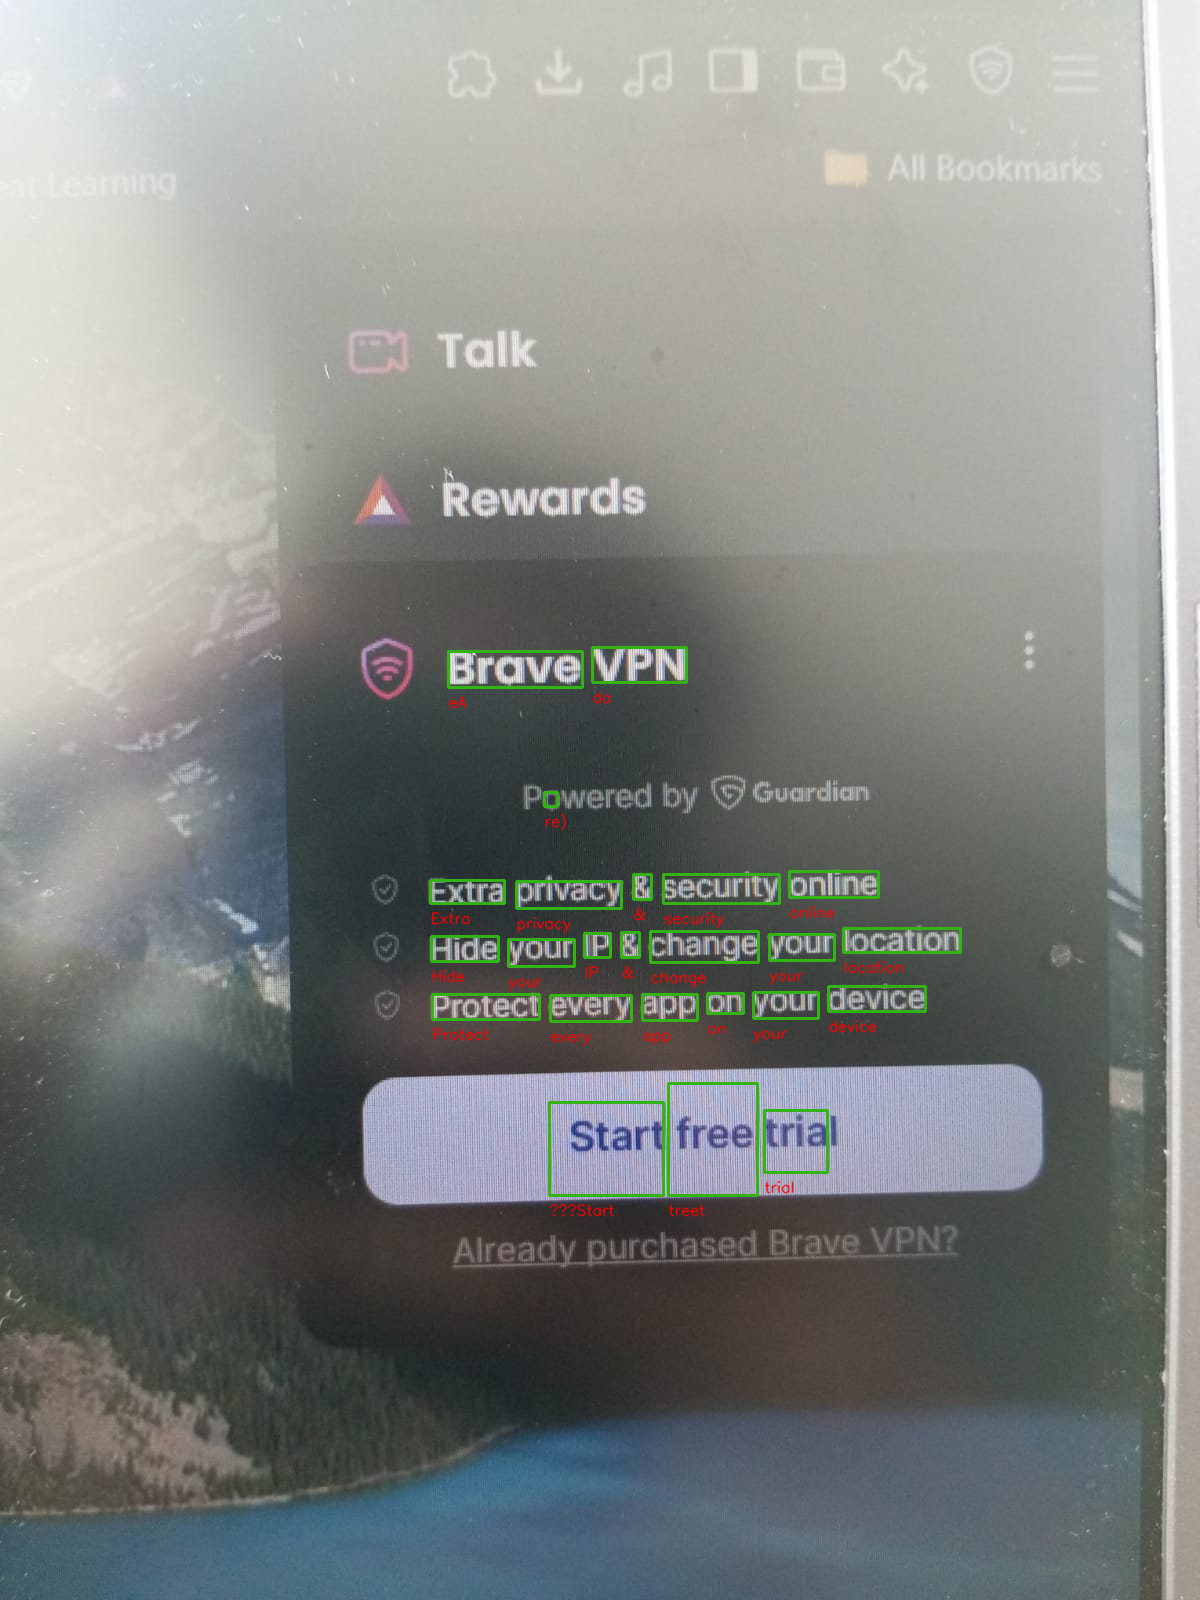

Info teks: 

Teks:eA -- Confidence:21.00 -- Posisi:(448, 651, 134, 36)
Teks:da -- Confidence:46.00 -- Posisi:(592, 647, 94, 35)
Teks:re) -- Confidence:41.00 -- Posisi:(544, 792, 13, 14)
Teks:Extra -- Confidence:96.00 -- Posisi:(430, 880, 74, 23)
Teks:privacy -- Confidence:93.00 -- Posisi:(516, 881, 105, 27)
Teks:& -- Confidence:93.00 -- Posisi:(633, 874, 18, 25)
Teks:security -- Confidence:96.00 -- Posisi:(663, 874, 116, 29)
Teks:online -- Confidence:96.00 -- Posisi:(789, 871, 89, 26)
Teks:Hide -- Confidence:95.00 -- Posisi:(431, 936, 67, 25)
Teks:your -- Confidence:96.00 -- Posisi:(508, 939, 66, 27)
Teks:IP -- Confidence:91.00 -- Posisi:(584, 933, 26, 24)
Teks:& -- Confidence:92.00 -- Posisi:(621, 932, 18, 25)
Teks:change -- Confidence:96.00 -- Posisi:(650, 931, 108, 31)
Teks:your -- Confidence:96.00 -- Posisi:(769, 934, 65, 26)
Teks:location -- Confidence:96.00 -- Posisi:(843, 928, 117, 24)
Teks:Protect -- Confidence:96.00 -- Posisi:(432, 994, 107, 25)
Teks:every -- Confidence:96.00 

In [5]:
from pytesseract import *
import cv2
from google.colab.patches import cv2_imshow

gambar = input("Put the file image's name with the extension: ")
img = cv2.imread(gambar)

if img is not None:
  height, width, _ = img.shape
  data = pytesseract.image_to_data(img, config="--psm 11 --oem 3",output_type=Output.DICT)
  teks_list = []

  panjang_teks = len(data['text'])
  for a in range(panjang_teks):
      if float(data['conf'][a]) > 20:
          (x, y, width, height) = (data['left'][a], data['top'][a], data['width'][a], data['height'][a])

          teks_info = {
              'teks': data['text'][a],
              'confidence': float(data['conf'][a]),
              'posisi': (x, y, width, height)
          }

          teks_list.append(teks_info)

          img = cv2.rectangle(img, (x, y), (x+width, y+height), (20,180,50), 2)
          img = cv2.putText(img, data['text'][a], (x, y+height+20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255),1,cv2.LINE_AA)

  cv2_imshow(img)
  cv2.imwrite("/content/img1.jpg", img)

  print("Info teks: \n")
  for teks_info in teks_list:
      print(f"Teks:{teks_info['teks']} -- Confidence:{teks_info['confidence']:.2f} -- Posisi:{teks_info['posisi']}")

  if len(teks_list) == 0:
    print("No text get detected")
  else:
    rata2_kepercayaan = sum(teks_info['confidence'] for teks_info in teks_list) / len(teks_list)
    print(f"\nJumlah Teks: {len(teks_list)}, average Kepercayaan: {rata2_kepercayaan:.2f}")

else:
  print("File is not valid")